# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [3]:
spaceship.dropna(inplace=True)

In [4]:
spaceship['Cabin'] = spaceship['Cabin'].str[0]

In [5]:
spaceship = spaceship.drop(['PassengerId', 'Name'], axis=1)

In [6]:
categorical_columns = spaceship.select_dtypes(include=['object', 'bool']).columns.tolist()

print(categorical_columns)

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Transported']


In [7]:
spaceship = pd.get_dummies(spaceship, columns=categorical_columns, drop_first=True)

In [8]:
spaceship = spaceship.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [9]:
spaceship

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Transported_True
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


**Perform Train Test Split**

In [10]:
print(spaceship.columns)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True',
       'Transported_True'],
      dtype='object')


In [11]:
features = spaceship.drop(columns = ["Transported_True"])
target = spaceship["Transported_True"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [13]:
normalizer = MinMaxScaler()

In [14]:
normalizer.fit(X_train)

MinMaxScaler()

In [15]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [16]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.405063,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.050633,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.379747,0.00000,0.007916,0.000000,0.051276,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.215190,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.329114,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.632911,0.0,0.000000,0.0,0.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.227848,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.189873,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.658228,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.784810,0.0,0.054775,0.0,0.07774,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
'''# Ajustes necessários
X_test_norm = np.array(X_test_norm)
y_test = np.array(y_test)

X_test_norm = np.ascontiguousarray(X_test_norm)
X_test_norm = X_test_norm.astype(np.float32)'''

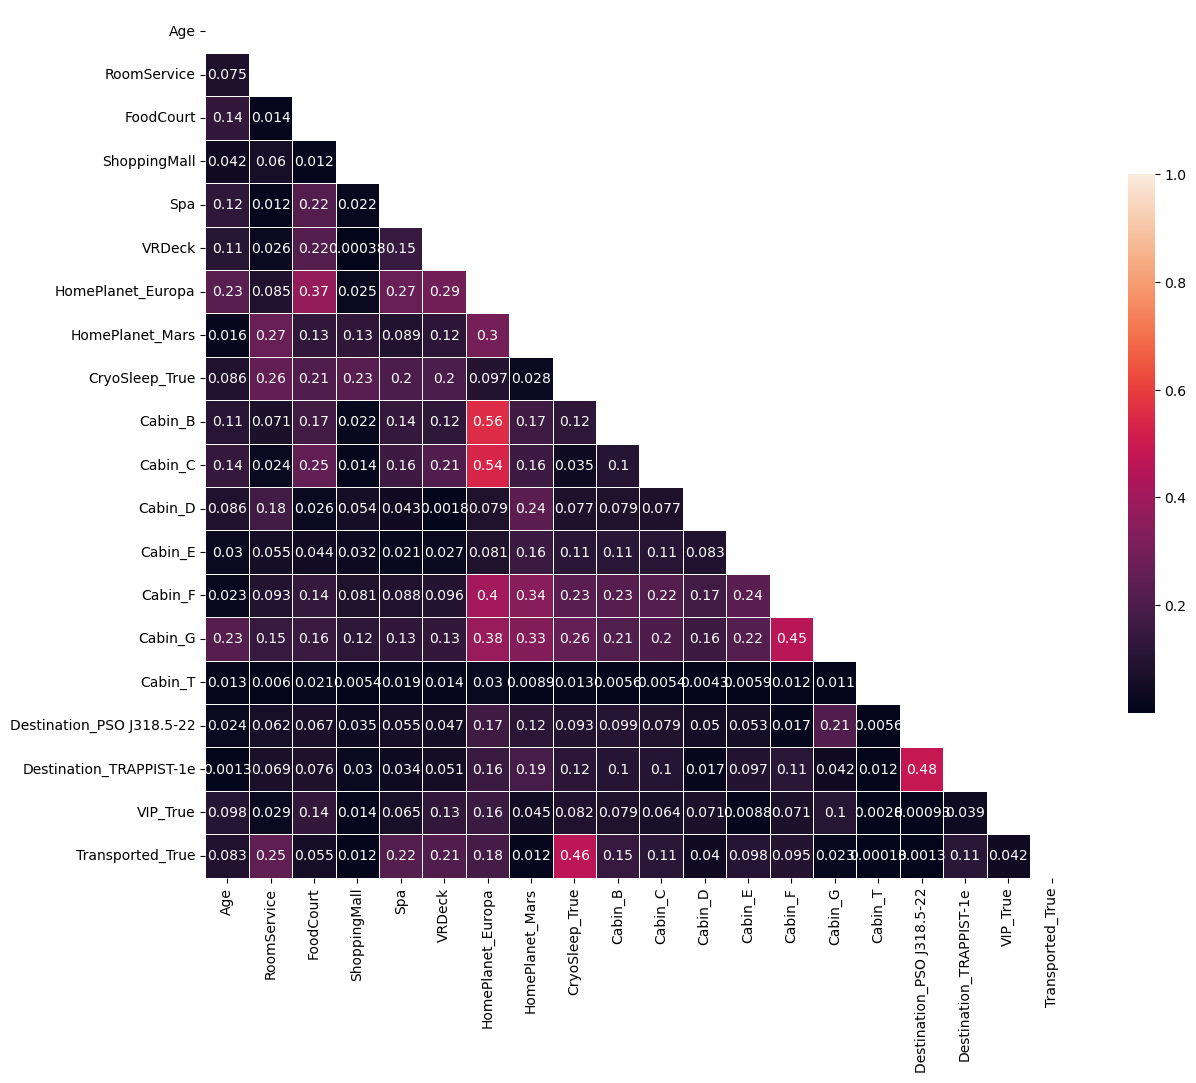

In [18]:
corr=np.abs(spaceship.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [19]:
X_train_reduced = X_train_norm.drop(columns=["Cabin_T", "FoodCourt", "ShoppingMall", "HomePlanet_Mars", "Cabin_D", "Cabin_G", "Destination_PSO J318.5-22", "VIP_True"])
X_test_reduced = X_test_norm.drop(columns=["Cabin_T", "FoodCourt", "ShoppingMall", "HomePlanet_Mars", "Cabin_D", "Cabin_G", "Destination_PSO J318.5-22", "VIP_True"])

**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [20]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [21]:
bagging_reg.fit(X_train_reduced, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [23]:
pred = bagging_reg.predict(X_test_reduced)

# Calculate Mean Absolute Error
print("MAE", mean_absolute_error(pred, y_test))

# Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("RMSE", rmse)

# Calculate R2 Score
print("R2 score", bagging_reg.score(X_test_reduced, y_test))


MAE 0.2923617438991679
RMSE 0.3883671455980041
R2 score 0.3966838408802347


- Random Forests

In [24]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [25]:
forest.fit(X_train_reduced, y_train)

RandomForestRegressor(max_depth=20)

In [26]:
pred = forest.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred, y_test))
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", forest.score(X_test_reduced, y_test))

MAE 0.2825253643530329
RMSE 0.3973543013094255
R2 score 0.36843823692359323


- Gradient Boosting

In [27]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [28]:
gb_reg.fit(X_train_reduced, y_train)

GradientBoostingRegressor(max_depth=20)

In [29]:
pred = gb_reg.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred, y_test))
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", gb_reg.score(X_test_reduced, y_test))

MAE 0.2803385584612691
RMSE 0.45672193231872377
R2 score 0.16562030615620438


- Adaptive Boosting

In [30]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [31]:
ada_reg.fit(X_train_reduced, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [32]:
pred = ada_reg.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred, y_test))
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", ada_reg.score(X_test_reduced, y_test))

MAE 0.26729087343251423
RMSE 0.4436986874348948
R2 score 0.21252589907420605


Which model is the best and why?

In [ ]:
# Bagging, because it has the best score.